In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install kagglehub

In [3]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("tunguz/online-retail")

print("Path to dataset files:", path)
df = pd.read_csv(path + '/' + os.listdir(path)[0], encoding='latin1')
df.shape

100%|█████████████████████████████████████████████████████████████████████████████| 7.13M/7.13M [00:01<00:00, 6.38MB/s]

Extracting files...


Path to dataset files: C:\Users\82107\.cache\kagglehub\datasets\tunguz\online-retail\versions\1


(541909, 8)

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
# 주문 가격 피쳐 생성
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

In [7]:
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

# 'InvoiceDate' 컬럼 이용하여 판매 월 추출
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

In [8]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,4,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,4,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,4,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,4,12


문제1. 모집단과 표본 집단의 TotalPrice를 비교해 주세요.

1-1 데이터셋에서 무작위로 1000개의 표본을 추출하세요.

In [9]:
# 1-1 무작위로 1000개 표본 추출
np.random.seed(42)
sample = df.sample(n=1000)

1-2 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교해주세요.


In [13]:
# 1-2 평균과 표준편차 비교
from scipy import stats

# 모집단 / 표본 평균과 표준편차
pop_mean = df["TotalPrice"].mean()
pop_std = df["TotalPrice"].std()
samp_mean = sample["TotalPrice"].mean()
samp_std = sample["TotalPrice"].std()

print(f"모집단 평균: {pop_mean:.2f}, 표본 평균: {samp_mean:.2f}")
print(f"모집단 표준편차: {pop_std:.2f}, 표본 표준편차: {samp_std:.2f}")

# 등분산성 검정 (Levene test)
levene_stat, levene_p = stats.levene(df["TotalPrice"], sample["TotalPrice"])
equal_var = True if levene_p > 0.05 else False
print(f"Levene p값: {levene_p:.5f} → 등분산 {'가정 가능' if equal_var else '가정 불가'}")

# 독립표본 t검정

t_stat, p_val = stats.ttest_ind(df["TotalPrice"], sample["TotalPrice"], equal_var=equal_var)
print(f"t={t_stat:.3f}, p={p_val:.5f}")

모집단 평균: 17.99, 표본 평균: 16.83
모집단 표준편차: 378.81, 표본 표준편차: 64.47
Levene p값: 0.79088 → 등분산 가정 가능
t=0.096, p=0.92314


귀무가설: 모집단과 표본의 평균은 같다.
대립가설: 모집단과 표본의 평균은 다르다.

p=0.92314
p-value ≥ 0.05 → 귀무가설 채택 → 평균 차이가 통계적으로 유의하지 않음.

→ 표본이 모집단을 잘 대표한다고 볼 수 있음.

1-3 중심극한정리를 사용해 모집단과 표본의 차이를 설명해주세요.

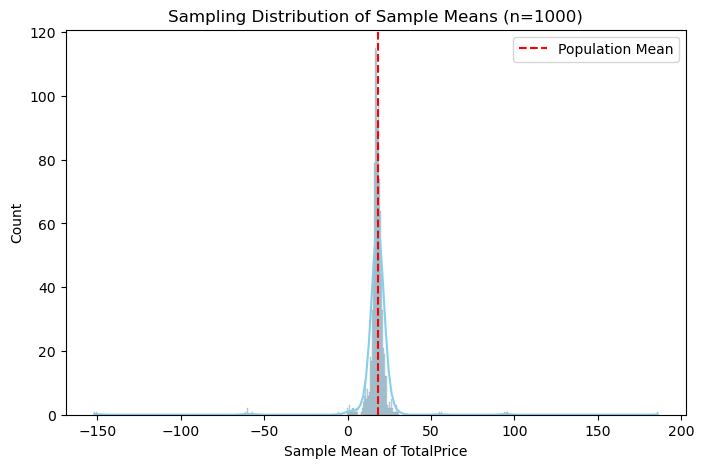

표본평균 분포의 평균: 17.64, 표준편차: 11.95


In [14]:
# 중심극한정리 확인: 1000개 표본평균을 여러 번 구해 분포 비교
np.random.seed(42)
means = [df["TotalPrice"].sample(n=1000, replace=False).mean() for _ in range(1000)]

plt.figure(figsize=(8,5))
sns.histplot(means, kde=True, color='skyblue')
plt.axvline(df["TotalPrice"].mean(), color='red', linestyle='--', label='Population Mean')
plt.title("Sampling Distribution of Sample Means (n=1000)")
plt.xlabel("Sample Mean of TotalPrice")
plt.legend()
plt.show()

print(f"표본평균 분포의 평균: {np.mean(means):.2f}, 표준편차: {np.std(means):.2f}")


중심극한정리는“모집단의 분포가 어떻든, 충분히 큰 표본을 여러 번 뽑으면 그 표본평균의 분포는 정규분포에 가까워진다.”

표본평균 분포의 평균이 17.64 모집단의 평균에 근접했고 이는 표본평균들이 전체적으로 모집단의 중심값과 비슷한 위치에 있다는 뜻
표본 표준편차가 11.95 으로 모집단의 표준편차보다 작은 이유는 표본을 여러번 뽑을수록 평균들이 모집단 중심으로 몰려 변동이 줄어들기 때문 

문제2. 주문이 가장 많은 상위 두 국가의 'TotalPrice' 평균에 차이가 있는지 검증하세요.


2-1 'Country' 변수를 바탕으로 주문이 가장 많은 상위 두 국가를 찾으세요.

In [16]:
import pandas as pd

# 국가별 주문 수 계산
top_countries = df['Country'].value_counts().head(2)
print(top_countries)

# 상위 두 국가명 추출
country1, country2 = top_countries.index[0], top_countries.index[1]
print('상위 두 국가:', country1, country2)

United Kingdom    495478
Germany             9495
Name: Country, dtype: int64
상위 두 국가: United Kingdom Germany


2-2 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요.

In [18]:
import numpy as np
from scipy import stats

# 각 국가에서 표본 1000개씩 무작위 추출
np.random.seed(42)
sample1 = df[df['Country'] == country1]['TotalPrice'].sample(1000, replace=False)
sample2 = df[df['Country'] == country2]['TotalPrice'].sample(1000, replace=False)

#독립표본 t검정
t_stat, p_val = stats.ttest_ind(sample1, sample2, equal_var=False)

print(f"t 통계량: {t_stat:.3f}")
print(f"p-value: {p_val:.5f}")

t 통계량: -1.816
p-value: 0.06954


2-3 t-통계량과 p-값을 해석하여 결과를 설명하고, 1종 오류와 2종 오류의 개념을 적용하여 설명해주세요.

t 통계량이 -1.816로 음수라는것은 country2 즉 Germany의 평균 크기가 더 크다는 것을 나타냄
p-value이 0.06954으로 유의수준 α = 0.05와 비교한다면
0.06954 > 0.05 → 귀무가설을 채택
두 국가의 TotalPrice 평균 차이는 통계적으로 유의하지 않다

1종의 오류: 실제로 두 국가 평균이 같은데, 차이가 있다고 잘못 결론
2종의 오류: 실제로 두 국가 평균이 다른데, 차이가 없다고 결론

1종의 오류는 p-value < 0.05일 때 발생할 수 있으므로 지금은 해당 없음
2종의 오류는 p-value ≥ 0.05 → 귀무가설 채택 → 가능성 존재

표본만 사용했으므로 실제 차이가 존재할 경우 이를 놓칠 가능성(2종 오류)은 존재함

문제3. 주중, 주말에 따라서 발생하는 UnitPrice의 분포가 달라지는지 확인하세요.

3-1 주중의 'UnitPrice'와 주말의 'UnitPrice'의 분포를 분석하기 위해 데이터의 중심경향치(평균, 중간값), 변산성(표준편차, 분산), 분위수를 계산하세요.

In [19]:
import pandas as pd
import numpy as np

# 주중과 주말 구분 (0=월, ..., 6=일)
# 일반적으로 0~4=주중, 5~6=주말
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# 그룹별 기술통계
group_stats = df.groupby('IsWeekend')['UnitPrice'].agg(
    mean='mean',
    median='median',
    std='std',
    var='var',
    q25=lambda x: np.percentile(x, 25),
    q50=lambda x: np.percentile(x, 50),
    q75=lambda x: np.percentile(x, 75)
).reset_index()

print(group_stats)


  IsWeekend      mean  median         std           var   q25   q50   q75
0   Weekday  4.843425    2.10  103.032058  10615.604927  1.25  2.10  4.13
1   Weekend  2.887824    1.85    7.959497     63.353599  1.25  1.85  3.75


3-2 상자수염그림과 히스토그램을 그려 시각화를 통해 분포를 확인하고 데이터의 분포에 대해 설명해주세요.

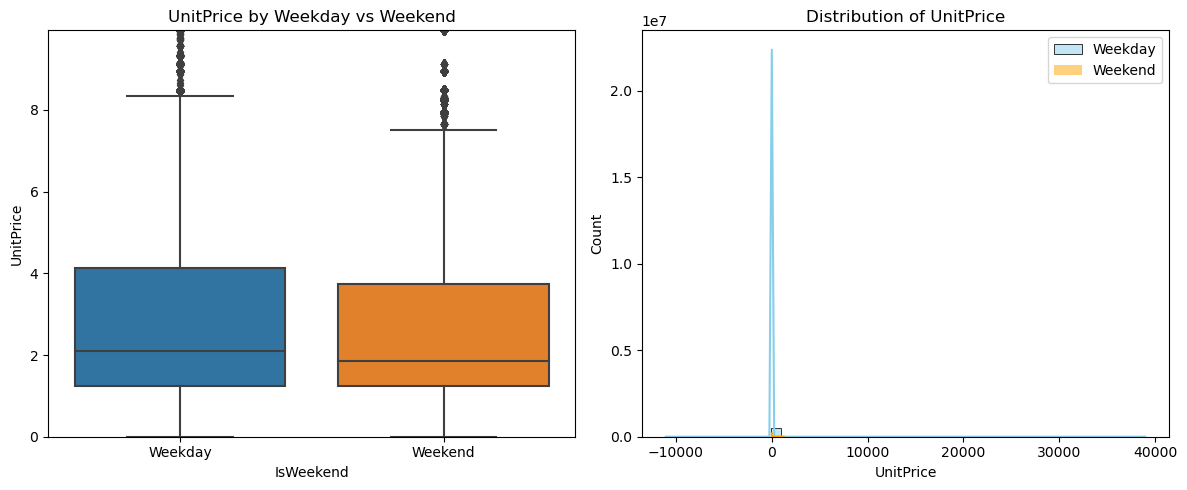

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))

# 상자수염 그림(Boxplot)
plt.subplot(1,2,1)
sns.boxplot(x='IsWeekend', y='UnitPrice', data=df)
plt.title('UnitPrice by Weekday vs Weekend')
plt.ylim(0, df['UnitPrice'].quantile(0.95))  # 극단치 제외하고 보기

# 히스토그램
plt.subplot(1,2,2)
sns.histplot(df[df['IsWeekend']=='Weekday']['UnitPrice'], color='skyblue', label='Weekday', kde=True, bins=50)
sns.histplot(df[df['IsWeekend']=='Weekend']['UnitPrice'], color='orange', label='Weekend', kde=True, bins=50)
plt.title('Distribution of UnitPrice')
plt.xlabel('UnitPrice')
plt.legend()

plt.tight_layout()
plt.show()

상자수염 그림 분석
- 중앙값 기준으로 보면 주중과 주말의 단가 차이는 크지 않음
- 사분위 범위를 봤을 때 주중과 주말 모두 1~4정도의 범위를 가짐
- 극단치(이상치)는 두 그룹 모두 상단에 다수 존재함 이를 통해 일부 주문 단가가 매우 높음을 알 수 있음

히스토그램 분석
- 주중과 주말 모두 0~10 단가 구간에 대부분 데이터 집중
- 극단치 때문에 y축 범위가 크게 잡혀 있음
- 분포가 오른쪽으로 꼬리가 긴 형태 → 왜도가 존재
- 전체적으로 패턴은 유사하지만, 주말 데이터는 약간 더 오른쪽 꼬리 길이 차이가 있음

문제4. 상품의 단가와 판매 국가, 판매 날짜을 이용해 판매 수량을 예측하는 회귀 모델을 만드세요.

4-1 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.

In [23]:
# 필요한 컬럼 선택
data = df[['Quantity', 'UnitPrice', 'Country', 'DayOfWeek', 'InvoiceMonth']].copy()

# 결측치 확인
print(data.isnull().sum())

# 결측치 제거
data.dropna(inplace=True)

# 이상치 제거: Quantity와 UnitPrice는 음수일 수 없음
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]

Quantity        0
UnitPrice       0
Country         0
DayOfWeek       0
InvoiceMonth    0
dtype: int64


In [24]:
#범주형 변수 인코딩
data = pd.get_dummies(data, columns=['Country'], drop_first=True)

4-2 변수를 다음과 같이 설정하여 다중 선형 회귀 분석을 진행하세요.
 - 종속변수: 판매 수량(Quantity)
 - 독립변수: 상품 단가(UnitPrice), 판매 국가(Country), 판매 요일(DayOfWeek), 판매 월( InvoiceMonth)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = data.drop('Quantity', axis=1)
y = data['Quantity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

coefficients = pd.Series(model.coef_, index=X.columns)
r2 = r2_score(y_test, y_pred)

print("회귀계수:")
print(coefficients)
print(f"\n결정계수(R^2): {r2:.4f}")

회귀계수:
UnitPrice                       -0.014375
DayOfWeek                       -0.178656
InvoiceMonth                    -0.044597
Country_Austria                -59.483298
Country_Bahrain                -54.567395
Country_Belgium                -59.185711
Country_Brazil                 -58.536289
Country_Canada                 -51.505847
Country_Channel Islands        -58.595094
Country_Cyprus                 -61.126291
Country_Czech Republic         -44.852487
Country_Denmark                -49.013274
Country_EIRE                   -51.919574
Country_European Community     -62.864346
Country_Finland                -55.746983
Country_France                 -57.450354
Country_Germany                -57.555536
Country_Greece                 -60.574320
Country_Hong Kong              -53.580255
Country_Iceland                -57.058034
Country_Israel                 -55.117057
Country_Italy                  -60.246315
Country_Japan                   11.538318
Country_Lebanon             

C:\Users\82107\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82107\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82107\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82107\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82107\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82107\anaconda3\li

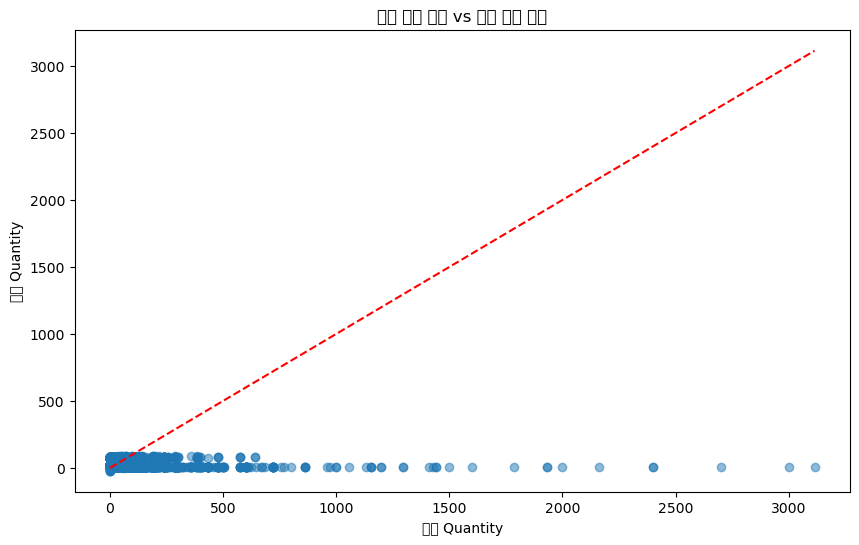

In [30]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("실제 Quantity")
plt.ylabel("예측 Quantity")
plt.title("실제 판매 수량 vs 예측 판매 수량")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

4-3 회귀계수와 결정계수를 활용하여 회귀 분석 결과를 해석해주세요.

1. 회귀계수 

      1) 연속형 변수
    
            - UnitPrice, DayOfWeek, InvoiceMonth 등 대체로 값이 음수를 띔, 각 단위가 1 상승하면 오히려 값은 감소하는 경향이 있음. 대부분 소폭 감소하기 때문에 영향은 작거나 미미함
    
      2) 범주형 변수 (Country)
    
            - 대부분의 국가 계수는 음수, 즉 기준 국가 대비 판매량이 낮음
            - 예외로는 Japan, Netherlands, Sweden 이 세 국가(양수)는 기준 국가보다 판매량이 많음

2. 결정계수
- 결정계수(R^2): 0.0277 (약 2.8%)
- 모델이 전체 판매 수량 변동의 약 2.8%만 설명함
- 즉, 단가(UnitPrice), 요일(DayOfWeek), 월(InvoiceMonth), 국가(Country)만으로는 판매량을 충분히 설명할 수 없음
- 다른요인이 판매 수량에 큰 영향을 미칠 가능성이 높음

3. 종합 해석

    1) 판매량에 가장 큰 영향 요인은 국가
        - 일본, 네덜란드, 스웨덴은 상대적으로 판매량이 많음
        - 대부분 다른 국가에서는 판매량이 기준 국가보다 낮음
    2) 단가, 요일, 월은 영향 미미
        - 단가 상승 시 판매량이 약간 줄어들지만 실제 영향은 거의 없음
    3) 모델 성능이 낮음
        - R²가 매우 낮으므로, 추가적인 변수를 고려하거나 다른 모델로 성능 향상 필요

문제5. 상품 정보와 거래 정보를 바탕으로 해당 거래가 반품될 가능성을 예측하는 로지스틱 회귀 모델을 만드세요.


5-1 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.

In [33]:
import pandas as pd
import numpy as np

# 필요한 컬럼 선택
data = df[['Quantity', 'UnitPrice', 'Country', 'DayOfWeek', 'InvoiceMonth']].copy()

# 결측치 제거
data.dropna(inplace=True)

# 이상치 제거
data = data[(data['UnitPrice'] > 0)]  # UnitPrice 음수 제거


5-2 Quantity 피쳐를 활용해 IsReturn 피쳐를 생성하세요.

In [34]:
data['IsReturn'] = np.where(data['Quantity'] < 0, 1, 0)

In [35]:
print(data['IsReturn'].value_counts())

0    530104
1      9288
Name: IsReturn, dtype: int64


5-3 모델 학습에 사용할 적절한 피쳐를 선정하세요.

In [36]:
data = pd.get_dummies(data, columns=['Country'], drop_first=True)
X = data.drop(['Quantity', 'IsReturn'], axis=1)
y = data['IsReturn']

5-4 모델 학습과 검증을 위해 데이터셋을 train셋과 test셋으로 나누세요.

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

5-5 IsReturn을 예측하는 로지스틱 회귀 모델을 학습하세요.

In [39]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

5-6 혼동행렬, 정밀도, 재현율, F1-score 등 다양한 평가지표를 사용하여 모델의 성능을 평가하세요.

혼동행렬:
[[106005     16]
 [  1847     11]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    106021
           1       0.41      0.01      0.01      1858

    accuracy                           0.98    107879
   macro avg       0.70      0.50      0.50    107879
weighted avg       0.97      0.98      0.97    107879

ROC-AUC: 0.5602


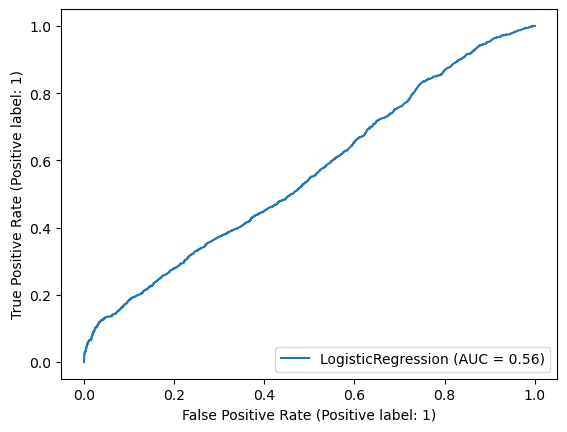

In [40]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay

# 혼동행렬
cm = confusion_matrix(y_test, y_pred)
print("혼동행렬:")
print(cm)

# 정밀도, 재현율, F1-score
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC: {roc_auc:.4f}")

# ROC 커브 시각화
RocCurveDisplay.from_estimator(model, X_test, y_test)

ROC-AUC = 0.5602

0.5 → 랜덤 예측 수준
0.56 → 모델이 반품 여부를 구분하는 능력이 거의 없음

즉, 현재 피쳐와 모델로는 반품 예측이 거의 불가능함

 - 종합 해석

1) 모델은 정상 거래는 잘 맞추지만, 반품 거래를 거의 못 잡음

2) Accuracy가 높지만 불균형 데이터 때문에 실제 성능은 매우 낮음

3) ROC-AUC도 낮음 → 현재 로지스틱 회귀와 피쳐만으로는 반품 예측이 거의 불가능

5-7 모델의 성능을 더 높일 수 있는 방안에 대해서 고민해보세요.

1. 불균형 데이터 처리

    - 반품 데이터가 적다면 SMOTE, ADASYN 등 오버샘플링 적용

    - 클래스 가중치 조정(class_weight='balanced')
      → 반품 예측 비율 향상

2. 피쳐 엔지니어링

    - Quantity 절대값, TotalPrice, InvoiceHour, 상품 카테고리 추가
    - 이전 구매/반품 히스토리 반영

3. 다른 모델 시도

    - 트리 기반 모델(RandomForest, XGBoost, LightGBM) 사용
      → 비선형 관계 포착 가능 → 성능 향상 기대

4. 임계값 조정

    - 예측 확률 기준(threshold) 변경 → 재현율 향상 가능
    
5. 하이퍼파라미터 튜닝

    - LogisticRegression: 정규화(C), penalty

    - 트리 계열 모델: depth, n_estimators 등